In [3]:
!pip install pandas_datareader

     |████████████████████████████████| 109 kB 1.0 MB/s eta 0:00:01


In [4]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import statsmodels.api as sm # module for OLS

import pandas_datareader.data as web  # module for reading datasets directly from the web
import pandas_datareader.famafrench as ff 

In [5]:
datasets = ff.get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))
print(datasets)

No. of datasets:297
['F-F_Research_Data_Factors', 'F-F_Research_Data_Factors_weekly', 'F-F_Research_Data_Factors_daily', 'F-F_Research_Data_5_Factors_2x3', 'F-F_Research_Data_5_Factors_2x3_daily', 'Portfolios_Formed_on_ME', 'Portfolios_Formed_on_ME_Wout_Div', 'Portfolios_Formed_on_ME_Daily', 'Portfolios_Formed_on_BE-ME', 'Portfolios_Formed_on_BE-ME_Wout_Div', 'Portfolios_Formed_on_BE-ME_Daily', 'Portfolios_Formed_on_OP', 'Portfolios_Formed_on_OP_Wout_Div', 'Portfolios_Formed_on_OP_Daily', 'Portfolios_Formed_on_INV', 'Portfolios_Formed_on_INV_Wout_Div', 'Portfolios_Formed_on_INV_Daily', '6_Portfolios_2x3', '6_Portfolios_2x3_Wout_Div', '6_Portfolios_2x3_weekly', '6_Portfolios_2x3_daily', '25_Portfolios_5x5', '25_Portfolios_5x5_Wout_Div', '25_Portfolios_5x5_Daily', '100_Portfolios_10x10', '100_Portfolios_10x10_Wout_Div', '100_Portfolios_10x10_Daily', '6_Portfolios_ME_OP_2x3', '6_Portfolios_ME_OP_2x3_Wout_Div', '6_Portfolios_ME_OP_2x3_daily', '25_Portfolios_ME_OP_5x5', '25_Portfolios_ME_OP

In [6]:
# fama-french industry portfolios
ff_10industry = web.DataReader('10_Industry_Portfolios','famafrench',start='1960-01-01',end='2022-12-31')
print('KEYS: {0}'.format(ff_10industry.keys())) # ds_industry is a dictionary
print('DATASET DESCRIPTION \n {0}'.format(ff_10industry['DESCR']))

# Use monthly value-weighted returns
ff_10ind = ff_10industry[0] 
print(ff_10ind.head())

KEYS: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 'DESCR'])
DATASET DESCRIPTION 
 10 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202301 CRSP database. It contains value- and equal-weighted returns for 10 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2023 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (756 rows x 10 cols)
  1 : Average Equal Weighted Returns -- Monthly (756 rows x 10 cols)
  2 : Average Value Weighted Returns -- Annual (63 rows x 10 cols)
  3 : Average Equal Weighted Returns -- Annual (63 rows x 10 cols)
  4 : Number of Firms in Portfolios (756 rows x 10 cols)
  5 : Average Firm Size (756 rows x 10 cols)
  6 : Sum of BE / Sum of ME (63 rows x 10 cols)
  7 : Value-Weighted Average of BE/ME (63 rows x 10 cols)
         NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  Oth

In [7]:
# fama-french 3 factor model (1993 paper)
ff_3factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1960-01-01', end='2022-12-31') 
print('KEYS: {0}'.format(ff_3factor.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ff_3factor['DESCR']))

# Use monthly value-weighted returns
ff_3fac = ff_3factor[0] 
print(ff_3fac.head())

KEYS: dict_keys([0, 1, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202301 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2023 Kenneth R. French

  0 : (756 rows x 4 cols)
  1 : Annual Factors: January-December (63 rows x 4 cols)
         Mkt-RF   SMB   HML    RF
Date                             
1960-01   -6.98  2.09  2.78  0.33
1960-02    1.17  0.51 -1.93  0.29
1960-03   -1.63 -0.49 -2.94  0.35
1960-04   -1.71  0.32 -2.28  0.19
1960-05    3.12  1.21 -3.70  0.27


In [8]:
# fama-french 5 factor model (2015 paper)
ff_5factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='1960-01-01', end='2022-12-31') 
print('KEYS: {0}'.format(ff_5factor.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ff_5factor['DESCR']))

# Use monthly value-weighted returns
ff_5fac = ff_5factor[0] 
print(ff_5fac.head())

ff_5fac.index=ff_5fac.index.strftime('%Y-%m') # string from time
print(ff_5fac.index)

KEYS: dict_keys([0, 1, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3
-------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202301 CRSP database. The 1-month TBill return is from Ibbotson and Associates Inc.

  0 : (714 rows x 6 cols)
  1 : Annual Factors: January-December (59 rows x 6 cols)
         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
1963-07   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1963-08    5.07 -0.80  1.80  0.36 -0.35  0.25
1963-09   -1.57 -0.52  0.13 -0.71  0.29  0.27
1963-10    2.53 -1.39 -0.10  2.80 -2.01  0.29
1963-11   -0.85 -0.88  1.75 -0.51  2.24  0.27
Index(['1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12',
       '1964-01', '1964-02', '1964-03', '1964-04',
       ...
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype='object', name='Date', length=714)


In [15]:
# Merge datasets: 10 industry portfolios + Fama-French factors
ff_10ind_3fac=pd.merge(ff_10ind, ff_3fac, how='inner', left_index=True, right_index=True)
print(ff_10ind_3fac.head(10))

# Define excess returns (over RF)
for i in range(0,10):
  colnm = ff_10ind_3fac.columns[i]
  new_colnm = colnm.strip() + '_RF'
  ff_10ind_3fac[new_colnm] = ff_10ind_3fac[colnm] - ff_10ind_3fac['RF'] # 무위험수익률을 빼줌 (rp - rf)

ff_10ind_3fac.rename(columns={'Mkt-RF':'MKT_RF'}, inplace=True)

         NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  Other  \
Date                                                                            
1960-01  -3.35 -11.36  -8.41  -7.49  -9.83   0.95  -5.70  -6.35  -2.07  -4.43   
1960-02   2.93  -2.07   0.49  -3.43   5.39   8.36   4.06   0.27   2.77   0.01   
1960-03  -1.41  -5.26  -3.55  -0.80   1.58   0.14   0.16   1.61   1.77  -2.34   
1960-04   1.54  -2.09  -3.53  -4.26   0.56  -1.05  -0.21   1.68   1.37  -1.14   
1960-05   6.52  -0.51   3.86  -3.46   9.57   3.32   3.29  13.77   1.52   0.33   
1960-06   4.32   0.69   1.68   3.52   1.42  -0.34   3.78  -0.16   5.79   2.85   
1960-07  -0.95  -0.50  -4.15   0.70  -4.21   0.10  -3.00  -3.86  -1.23  -1.54   
1960-08   4.52   3.20   1.70   4.10   1.16   7.11   3.14   2.46   4.46   3.02   
1960-09  -3.41  -5.30  -7.03  -1.00  -8.73  -5.91  -8.39  -8.71  -4.55  -5.80   
1960-10   1.65  -0.98  -0.97   2.43  -3.26   0.14   0.22  -3.49  -0.31  -0.86   

         Mkt-RF   SMB   HML

In [16]:
print(ff_10ind_3fac.columns)

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth ',
       'Utils', 'Other', 'MKT_RF', 'SMB', 'HML', 'RF', 'NoDur_RF', 'Durbl_RF',
       'Manuf_RF', 'Enrgy_RF', 'HiTec_RF', 'Telcm_RF', 'Shops_RF', 'Hlth_RF',
       'Utils_RF', 'Other_RF'],
      dtype='object')


In [17]:
print(ff_10ind_3fac.head(10))

         NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  Other  \
Date                                                                            
1960-01  -3.35 -11.36  -8.41  -7.49  -9.83   0.95  -5.70  -6.35  -2.07  -4.43   
1960-02   2.93  -2.07   0.49  -3.43   5.39   8.36   4.06   0.27   2.77   0.01   
1960-03  -1.41  -5.26  -3.55  -0.80   1.58   0.14   0.16   1.61   1.77  -2.34   
1960-04   1.54  -2.09  -3.53  -4.26   0.56  -1.05  -0.21   1.68   1.37  -1.14   
1960-05   6.52  -0.51   3.86  -3.46   9.57   3.32   3.29  13.77   1.52   0.33   
1960-06   4.32   0.69   1.68   3.52   1.42  -0.34   3.78  -0.16   5.79   2.85   
1960-07  -0.95  -0.50  -4.15   0.70  -4.21   0.10  -3.00  -3.86  -1.23  -1.54   
1960-08   4.52   3.20   1.70   4.10   1.16   7.11   3.14   2.46   4.46   3.02   
1960-09  -3.41  -5.30  -7.03  -1.00  -8.73  -5.91  -8.39  -8.71  -4.55  -5.80   
1960-10   1.65  -0.98  -0.97   2.43  -3.26   0.14   0.22  -3.49  -0.31  -0.86   

         ...  NoDur_RF  Dur

In [10]:
# Run OLS model
model = sm.formula.ols(formula = 'Enrgy_RF ~ MKT_RF + SMB + HML', data = ff_10ind_3fac).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Enrgy_RF   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     232.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.59e-106
Time:                        16:04:05   Log-Likelihood:                -2178.5
No. Observations:                 756   AIC:                             4365.
Df Residuals:                     752   BIC:                             4383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0400      0.160      0.250      0.8

In [11]:
alpha = [0]*10
tval = [0]*10

for i in range(0,10):
  regeq = ff_10ind_3fac.columns[i+14] + ' ~ MKT_RF + SMB + HML'
  model = sm.formula.ols(formula = regeq, data = ff_10ind_3fac).fit()
  alpha[i] = model.params[0]
  tval[i] = model.tvalues[0]

print('Average alpha is {:.2f}%'.format(np.mean(alpha)))
print('Average t-statistics is {:.2f}'.format(np.mean(tval)))

Average alpha is 0.05%
Average t-statistics is 0.45


/var/folders/db/bpz0hmcx5zq0d724jv46hmq40000gn/T/ipykernel_20787/1240595875.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])


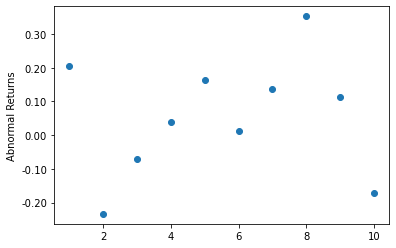

/var/folders/db/bpz0hmcx5zq0d724jv46hmq40000gn/T/ipykernel_20787/1240595875.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])


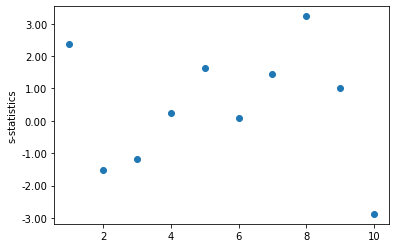

In [12]:
# Draw plot of alphas
x_axis = list(range(1,11))
x_axis
plt.plot(x_axis, alpha, 'o')
plt.ylabel('Abnormal Returns')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])
plt.show()

# Draw plot of t-statistics
x_axis = list(range(1,11))
x_axis
plt.plot(x_axis, tval, 'o')
plt.ylabel('s-statistics')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])
plt.show()